<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumSubroutineAlgorithms_QAA_Grok_mkbahk_20250407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-f4k2u86d
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-f4k2u86d
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer, AerSimulator
from IPython.display import display, Math
import numpy as np

from qiskit.primitives import Sampler

In [ ]:
# 큐비트 수 설정 (3큐비트 시스템)
n_qubits = 3

# 양자 회로 초기화: 큐비트 수 + 측정을 위한 클래식 비트
qc = QuantumCircuit(n_qubits, n_qubits)

# 초기 상태 준비: 모든 큐비트에 하다마드 게이트 적용하여 균일한 중첩 상태 생성
# |000> -> (|000> + |001> + |010> +... +|111>)/3
for i in range(n_qubits):
    qc.h(i)
###for

# 오라클 정의: 목표 상태 |111>을 식별
# |111> 상태에 -1 위상 적용 (즉, |111> -> -|111>)
oracle = np.identity(2**n_qubits)  # 8x8 단위 행렬로 초기화
oracle[7, 7] = -1  # |111> 상태(인덱스 3)에 -1 적용
qc.append(Operator(oracle), range(n_qubits))  # 오라클을 회로에 추가

# 확산 연산자(Diffuser) 정의
# 초기 상태 |s>를 제외한 모든 상태의 진폭을 반전
diffuser = np.ones((2**n_qubits, 2**n_qubits)) * (2 / (2**n_qubits))  # 2|s><s| 항
diffuser -= np.identity(2**n_qubits)  # -I 항
qc.append(Operator(diffuser), range(n_qubits))  # 확산 연산자를 회로에 추가

# 측정: 모든 큐비트를 측정하여 결과를 클래식 레지스터에 저장
qc.measure(range(n_qubits), range(n_qubits))

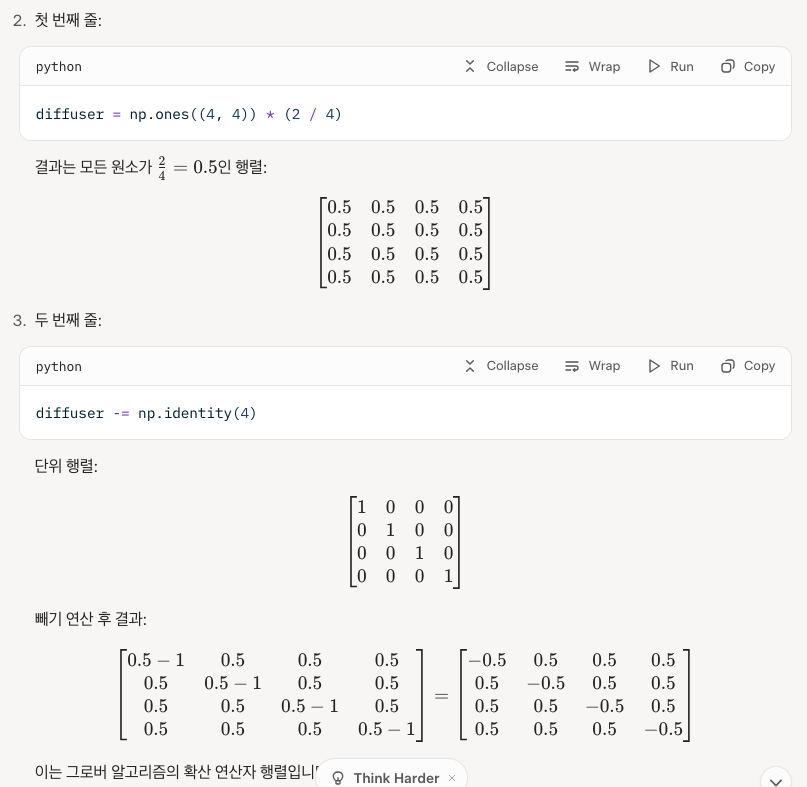

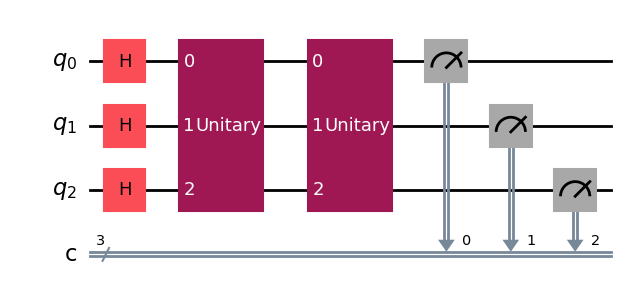

In [ ]:
qc.draw('mpl')

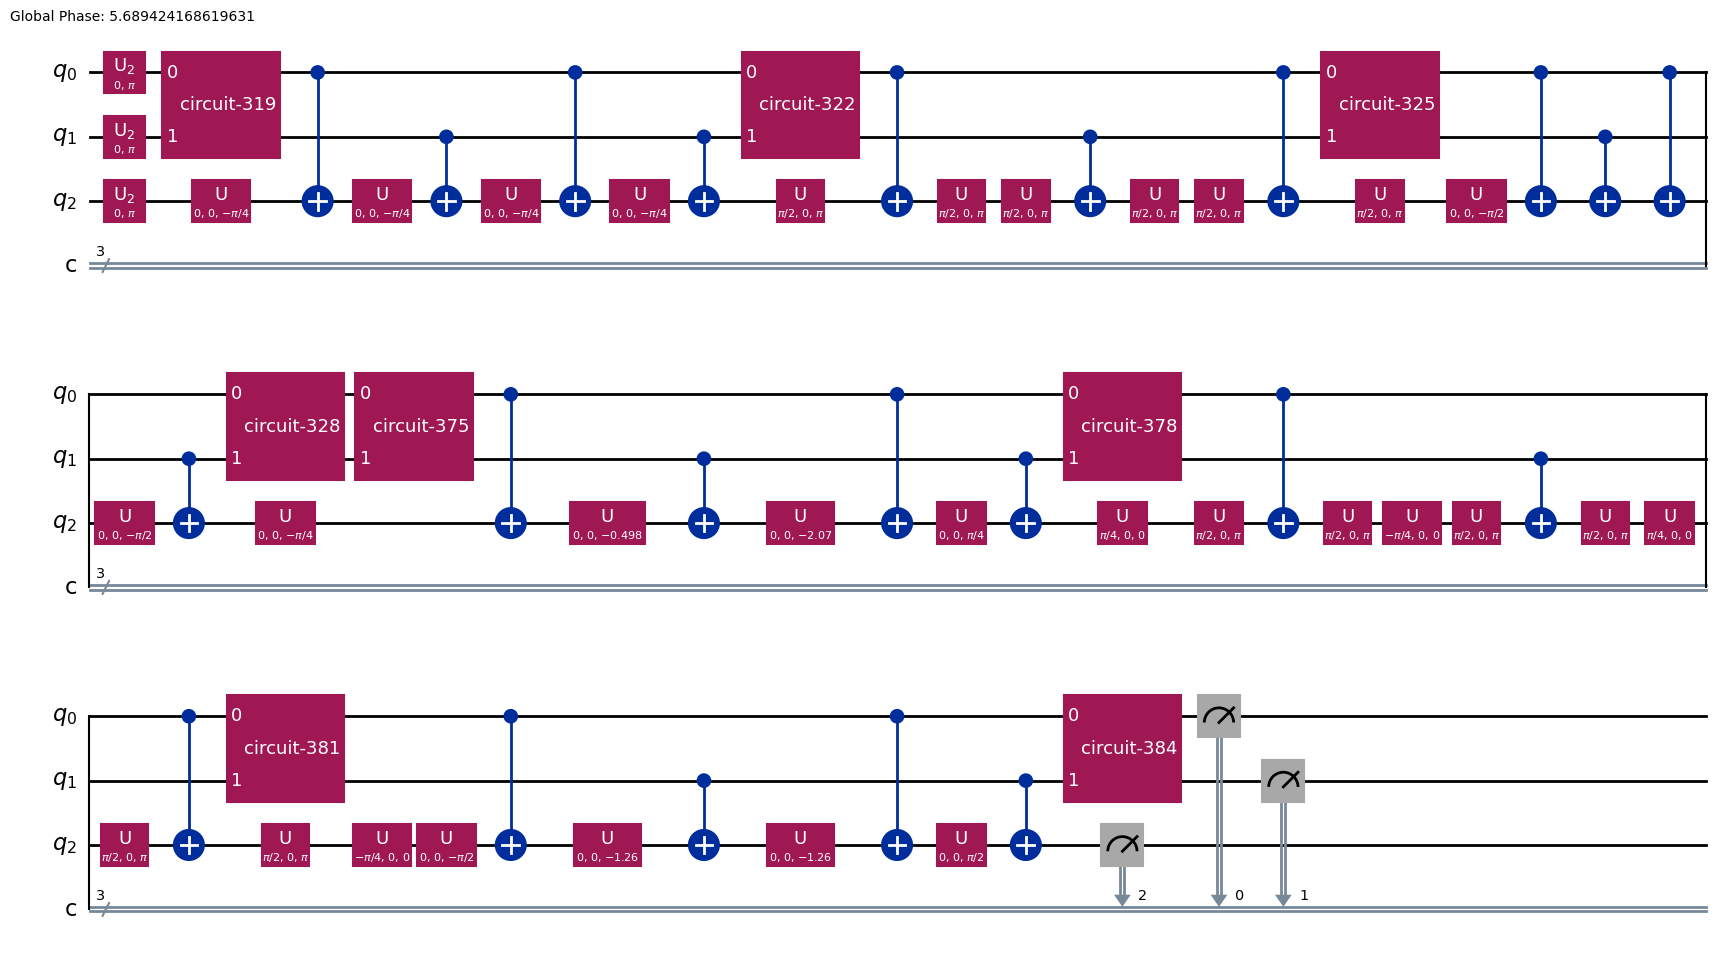

In [ ]:
qc.decompose().draw('mpl')

In [ ]:
# 시뮬레이터 설정: Aer의 qasm_simulator 사용
simulator = Aer.get_backend('qasm_simulator')

# 회로 실행: 1024번 샷으로 시뮬레이션
job = simulator.run(qc, shots=1024)

# 결과 가져오기
result = job.result()
counts = result.get_counts(qc)

# 결과 출력: 각 상태의 측정 횟수
print("Measurement counts:", counts)

Measurement counts: {'100': 22, '101': 44, '010': 27, '000': 28, '110': 39, '001': 23, '011': 20, '111': 821}


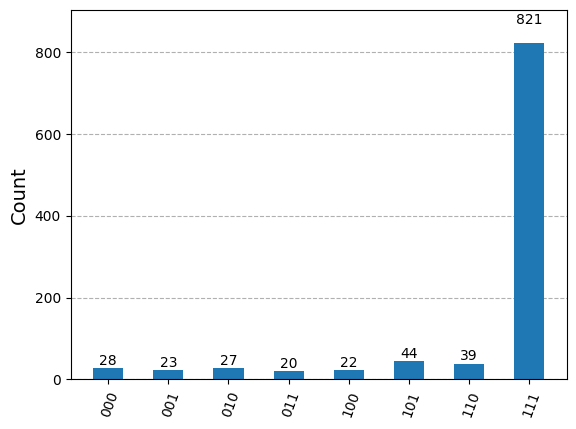

In [ ]:
plot_histogram(counts)